In [1]:
pip install pmdarima


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Reading the data
import pandas as pd
import numpy as np
df = pd.read_excel(r"Fytlyff_DS_Interview.xlsx")
print(df)

      Year Month   Laptop/Desktop Type_of_Customers?           Coming from  \
0     2020   Jan  Desktop_Website  Existing_Customer    Came_From_LinkedIn   
1     2020   Jan  Desktop_Website  Existing_Customer    Came_From_LinkedIn   
2     2020   Jan  Desktop_Website  Existing_Customer    Came_From_LinkedIn   
3     2020   Jan  Desktop_Website  Existing_Customer    Came_From_LinkedIn   
4     2020   Jan  Desktop_Website  Existing_Customer    Came_From_LinkedIn   
...    ...   ...              ...                ...                   ...   
2155  2022   Dec   Laptop_Website       New_Customer  Unidentified_Sources   
2156  2022   Dec   Laptop_Website       New_Customer  Unidentified_Sources   
2157  2022   Dec   Laptop_Website       New_Customer  Unidentified_Sources   
2158  2022   Dec   Laptop_Website       New_Customer  Unidentified_Sources   
2159  2022   Dec   Laptop_Website       New_Customer  Unidentified_Sources   

     Place_in_India   Level 1   Level 2  Level 3  Level 4  
0  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


In [6]:
df['Place_in_India']

0       Bengaluru
1       Hyderabad
2        Dehradun
3          Indore
4            Pune
          ...    
2155    Bengaluru
2156    Hyderabad
2157     Dehradun
2158       Indore
2159         Pune
Name: Place_in_India, Length: 2160, dtype: object

In [7]:
#Data Cleaning
def data_cleaning(data_frame):
  print(type(data_frame))

  data_frame["Month"] = data_frame["Month"].replace(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"], ["1","2","3","4","5","6","7","8","9","10","11","12"])
  data_frame["Year"] = data_frame["Year"].replace([2020, 2021, 2022], ["2020", "2021", "2022"])
  func = lambda x :  list(pd.to_datetime(x[['Year', 'Month']].assign(DAY=1)))
  data_frame['Month_Year']=func(data_frame)
  cols = data_frame.columns.tolist()
  print(cols)
  col = cols[0:2] + ['Month_Year'] + cols[2:len(cols)-1]
  print(col)
  data_frame = data_frame[col]
  #print(data_frame)
  
  # data_frame = data_frame.fillna(data_frame.mean())
  data_frame['Level 1'] = data_frame['Level 1'].fillna(data_frame['Level 1'].mean())
  data_frame['Level 2'] = data_frame['Level 2'].fillna(data_frame['Level 2'].mean())
  data_frame["Coming from"] = data_frame["Coming from"].replace(["Came_From_LinkedIn"], ["LinkedIn"])
  data_frame["Coming from"] = data_frame["Coming from"].replace(["Landed_Directly"], ["Direct_traffic"])
  lis1 = []
  for i in data_frame['Level 1']:
    lis1.append(i)

  lis2 = []
  for j in data_frame['Level 4']:
    lis2.append(j)
  lis3 = []
  for i in range(0, len(lis1)):
    val = (lis1[i] - lis2[i])/lis1[i]*100
    lis3.append(val)
  data_frame['inc/dec percentage'] = lis3

  return(data_frame)

In [8]:
print(df['Level 1'])
df = data_cleaning(df)
print(df)
print(df.columns)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2155     67299.0
2156    430294.0
2157     48713.0
2158    593021.0
2159    372897.0
Name: Level 1, Length: 2160, dtype: float64
<class 'pandas.core.frame.DataFrame'>
['Year', 'Month', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from', 'Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Month_Year']
['Year', 'Month', 'Month_Year', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from', 'Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 4']
      Year Month Month_Year   Laptop/Desktop Type_of_Customers?  \
0     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
1     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
2     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
3     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
4     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
...    ...   ...        ...    

In [9]:
#Descriptive statastics
def descriptive_stats(df):
  lst = list(df.select_dtypes(include=['int', 'float']))
  for i in lst:
    median = df[i].median()
    first_quartile = np.percentile(df[i], 25)
    second_quartile = np.percentile(df[i], 50)
    third_quartile = np.percentile(df[i], 75)
    mean = df[i].mean()
    print("descriptive statastics for the column ",i," is ")
    print("Min vale of Level 1 is: ", df['Level 1'].min())
    print("Min vale of Level 2 is: ", df['Level 2'].min())
    print("Min vale of Level 3 is: ", df['Level 3'].min())
    print("Min vale of Level 4 is: ", df['Level 4'].min())
    df_new = df[df['Laptop/Desktop'] == 'Desktop_Website']
    print("Max value from desktop for level 1")
    print(df_new['Level 1'].max())
    print("Max value from desktop for level 2")
    print(df_new['Level 2'].max())
    print("mean", mean)
    print("median", median)
    print("first quartile", first_quartile)
    print("second quartile", second_quartile)
    print("third quartile", third_quartile)
    print("List of unique values for each column is")
    lst = list(df.columns)
    print(lst)
  for i in lst:
    print("unique value for the column ", i, df[i].unique())
  lst = list(df.select_dtypes(exclude=['int','float','double','long']).dtypes)
  print(lst)

In [10]:
df['Month_Year'].unique()

<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00']
Length: 36, dtype: datetime64[ns]

In [11]:
descriptive_stats(df)

descriptive statastics for the column  Level 1  is 
Min vale of Level 1 is:  24567.0
Min vale of Level 2 is:  8425.0
Min vale of Level 3 is:  3761
Min vale of Level 4 is:  766
Max value from desktop for level 1
11274131.0
Max value from desktop for level 2
4079301.0
mean 783870.2220166512
median 783870.2220166513
first quartile 381356.0
second quartile 783870.2220166513
third quartile 783870.2220166513
List of unique values for each column is
['Year', 'Month', 'Month_Year', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from', 'Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'inc/dec percentage']
descriptive statastics for the column  Level 2  is 
Min vale of Level 1 is:  24567.0
Min vale of Level 2 is:  8425.0
Min vale of Level 3 is:  3761
Min vale of Level 4 is:  766
Max value from desktop for level 1
11274131.0
Max value from desktop for level 2
4079301.0
mean 358215.4162812211
median 358215.4162812211
first quartile 172895.25
second quartile 358215.4162812211
third qu

In [12]:
df_new = df[df['Laptop/Desktop'] == 'Desktop_Website']
print(df_new)

      Year Month Month_Year   Laptop/Desktop Type_of_Customers?  \
0     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
1     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
2     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
3     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
4     2020     1 2020-01-01  Desktop_Website  Existing_Customer   
...    ...   ...        ...              ...                ...   
2125  2022    12 2022-12-01  Desktop_Website       New_Customer   
2126  2022    12 2022-12-01  Desktop_Website       New_Customer   
2127  2022    12 2022-12-01  Desktop_Website       New_Customer   
2128  2022    12 2022-12-01  Desktop_Website       New_Customer   
2129  2022    12 2022-12-01  Desktop_Website       New_Customer   

               Coming from Place_in_India        Level 1        Level 2  \
0                 LinkedIn      Bengaluru  783870.222017  358215.416281   
1                 LinkedIn      Hyderabad  78

In [13]:
#Prescriptive Statastics
for i in df.columns[7:]:
  dfnew = df.groupby(['Year','Place_in_India'])[i].sum().sort_index(level=1, ascending=False)
  print('as per level', i)
  print(dfnew)

as per level Level 1
Year  Place_in_India
2022  Pune              1.887674e+08
2021  Pune              1.845058e+08
2020  Pune              1.145010e+08
2022  Indore            1.676502e+08
2021  Indore            1.523724e+08
2020  Indore            1.316225e+08
2022  Hyderabad         1.183898e+08
2021  Hyderabad         1.046326e+08
2020  Hyderabad         7.834567e+07
2022  Dehradun          7.976635e+07
2021  Dehradun          7.697687e+07
2020  Dehradun          7.505743e+07
2022  Bengaluru         7.737021e+07
2021  Bengaluru         7.346057e+07
2020  Bengaluru         6.974099e+07
Name: Level 1, dtype: float64
as per level Level 2
Year  Place_in_India
2022  Pune              7.369237e+07
2021  Pune              6.713751e+07
2020  Pune              5.750787e+07
2022  Indore            8.372180e+07
2021  Indore            7.035038e+07
2020  Indore            7.702644e+07
2022  Hyderabad         5.416432e+07
2021  Hyderabad         4.603284e+07
2020  Hyderabad         3.930626e+0

In [14]:
dfnew = df.groupby(['Year','Place_in_India'])[['Level 1','Level 2','Level 3','Level 4']].sum()
#print(dfnew)
#print(dfnew.loc[[('2020','Bengaluru')]]['Level 1'])
dfnew['lev2/lev1'] = dfnew['Level 2']/dfnew['Level 1']
dfnew['lev3/lev1'] = dfnew['Level 3']/dfnew['Level 1']
dfnew['lev4/lev1'] = dfnew['Level 4']/dfnew['Level 1']
dfnew=dfnew.drop(columns=['Level 1', 'Level 2', 'Level 3', 'Level 4'], axis=1)
print(dfnew)

                     lev2/lev1  lev3/lev1  lev4/lev1
Year Place_in_India                                 
2020 Bengaluru        0.488079   0.109296   0.046336
     Dehradun         0.483189   0.101910   0.049106
     Hyderabad        0.501703   0.136220   0.065812
     Indore           0.585207   0.321899   0.152649
     Pune             0.502248   0.266550   0.096418
2021 Bengaluru        0.453393   0.090450   0.042744
     Dehradun         0.436285   0.081112   0.031764
     Hyderabad        0.439948   0.148135   0.074894
     Indore           0.461700   0.258978   0.115071
     Pune             0.363878   0.164717   0.069406
2022 Bengaluru        0.441282   0.101524   0.048503
     Dehradun         0.419564   0.102348   0.033521
     Hyderabad        0.457508   0.206666   0.069364
     Indore           0.499384   0.313373   0.090095
     Pune             0.390387   0.191877   0.059378


In [15]:
#ML questions
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                2160 non-null   object        
 1   Month               2160 non-null   object        
 2   Month_Year          2160 non-null   datetime64[ns]
 3   Laptop/Desktop      2160 non-null   object        
 4   Type_of_Customers?  2160 non-null   object        
 5   Coming from         2160 non-null   object        
 6   Place_in_India      2160 non-null   object        
 7   Level 1             2160 non-null   float64       
 8   Level 2             2160 non-null   float64       
 9   Level 3             2160 non-null   int64         
 10  Level 4             2160 non-null   int64         
 11  inc/dec percentage  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 202.6+ KB


In [18]:
df = df.set_index("Month_Year")
print(df.info())
df = data_cleaning(df)
print(df)
print(sdf.columns)
plt.figure(figsize=(20,8))
sns.lineplot(data=df['Level 4'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2020-01-01 to 2022-12-01
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   object 
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             2160 non-null   float64
 7   Level 2             2160 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
 10  inc/dec percentage  2160 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 202.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
['Year', 'Month', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from', 'Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 

NameError: name 'sdf' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Level 4'])

1. ADF :  -10.078331696590029
2. P-Value :  1.2070774227037903e-17
3. Num Of Lags :  26
4. Num Of Observations Used For ADF Regression: 2133
5. Critical Values :
	 1% :  -3.433419473570619
	 5% :  -2.862895974588963
	 10% :  -2.5674918550982277


In [19]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Level 4'], trace=True, suppress_warnings=True)
#print(type(stepwise_fit))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55000.885, Time=2.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55240.425, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55040.488, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55039.370, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56069.593, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55032.680, Time=1.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55038.799, Time=0.83 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=55002.386, Time=1.87 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=55002.855, Time=1.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55038.590, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55020.234, Time=1.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55036.272, Time=1.06 sec


In [ ]:
#order for the trained model is: 
print(stepwise_fit.order)

(3, 0, 3)


In [ ]:
#making the model with test dataset and training dataset
#spliting dataset into 80:20 ratio
print(df.shape)
train=df.iloc[:-432]
test=df.iloc[-432:]
print(train.shape,test.shape)

(2160, 12)
(1728, 12) (432, 12)


In [ ]:
df.info()
print(df.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2020-01-01 to 2022-12-01
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                2160 non-null   object        
 1   Month               2160 non-null   object        
 2   Month_Year          2160 non-null   datetime64[ns]
 3   Laptop/Desktop      2160 non-null   object        
 4   Type_of_Customers?  2160 non-null   object        
 5   Coming from         2160 non-null   object        
 6   Place_in_India      2160 non-null   object        
 7   Level 1             2160 non-null   float64       
 8   Level 2             2160 non-null   float64       
 9   Level 3             2160 non-null   int64         
 10  Level 4             2160 non-null   int64         
 11  inc/dec percentage  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 219.4+ KB
Datetime

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train["Level 4"],order=stepwise_fit.order)
model=model.fit()
model.summary()

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Level 4   No. Observations:                 1728
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -21815.339
Date:                Mon, 22 Apr 2024   AIC                          43646.678
Time:                        02:19:43   BIC                          43690.316
Sample:                             0   HQIC                         43662.820
                               - 1728                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.797e+04   3486.445     16.628      0.000    5.11e+04    6.48e+04
ar.L1         -1.0145      0.029    -35.316      0.000      -1.071      -0.958
ar.L2         -0.8993      0.040    -22.702      0.000      -0.977      -0.822
ar.L3         -0.1603      0.034     -4.665      0.000      -0.228      -0.093
ma.L1          1.4514      0.027     54.201      0.000       1.399       1.504
ma.L2          1.4229      0.033     42.757      0.000       1.358       1.488
ma.L3          0.6736      0.029     22.926      0.000       0.616       0.731
sigma2      5.794e+09      0.083   6.96e+10      0.000    5.79e+09    5.79e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             34944.07
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             3.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.4e+25. Standard errors may be unstable.
"""

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<class 'pandas.core.series.Series'>


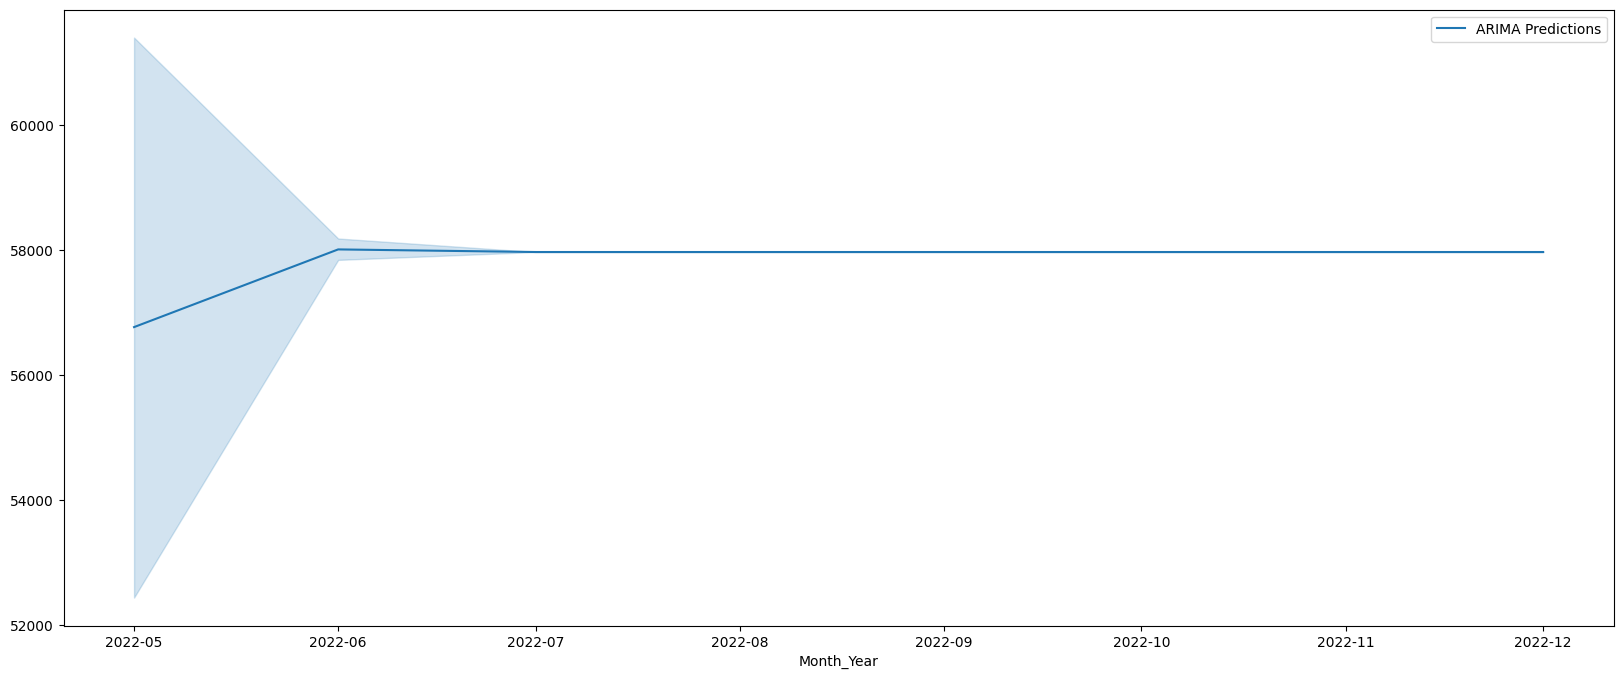

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred1=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred1.index = df.index[start:end+1]
df1 = pd.DataFrame(pred1)
plt.figure(figsize=(20,8))
sns.lineplot(data=df1)
print(type(pred1))
#pred1.plot(legend=True)#

<Axes: xlabel='Month_Year', ylabel='Level 4'>

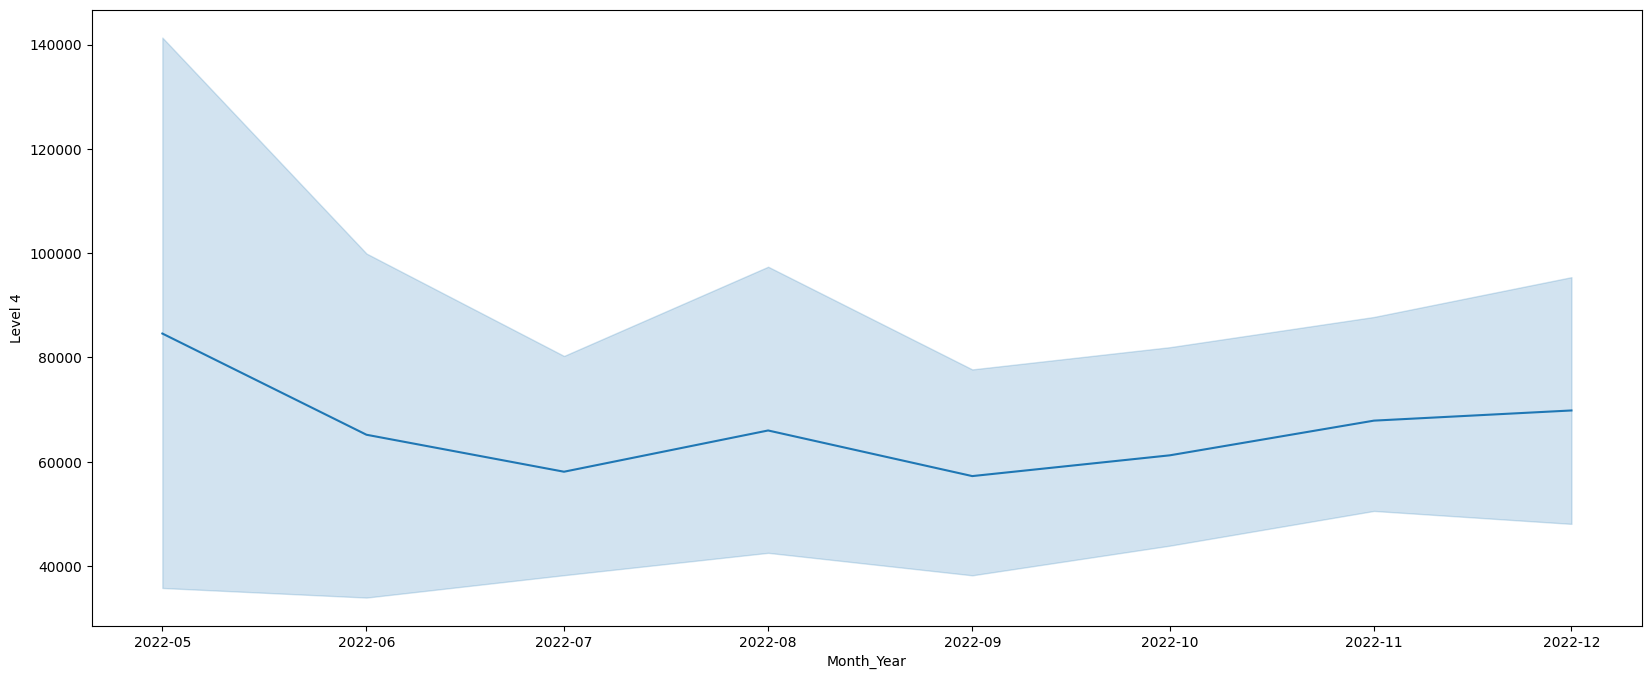

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=test['Level 4'])
#test['Level 4'].plot(legend=True)

In [27]:
test['Level 4'].mean()

64217.00925925926

In [28]:
def predict_future(df_pred_future, fitorder):
  #df_pred_future.rename("Actual")
  model2 = ARIMA(df_pred_future, order=fitorder)
  model2 = model2.fit()
  print(model2.summary())
  index_future_dates=pd.date_range(start='2022-12-01', end='2023-12-01', freq='M')
  print(index_future_dates)
  pred=model2.predict(start=len(df), end=len(df)+11, typ='levels').rename('predicted')
  pred.index=index_future_dates
  print(fitorder)
  dfpred = pd.DataFrame(pred)
  df_pred_future2 = df_pred_future.rename("Actual")
  frames = [df_pred_future2, dfpred]
  dfpred = pd.concat(frames)
  plt.figure(figsize=(20,8))
  sns.lineplot(data=dfpred)

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Level 4   No. Observations:                 2160
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -27442.205
Date:                Mon, 22 Apr 2024   AIC                          54900.411
Time:                        02:19:46   BIC                          54945.834
Sample:                             0   HQIC                         54917.024
                               - 2160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.922e+04   3118.904     18.988      0.000    5.31e+04    6.53e+04
ar.L1         -1.0375      0.037    -28.077      0.000      -1.110      -0.965
ar.L2         -0.9737      0.047    -20.906      0.0

C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\2074375558.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_future_dates=pd.date_range(start='2022-12-01', end='2023-12-01', freq='M')
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']

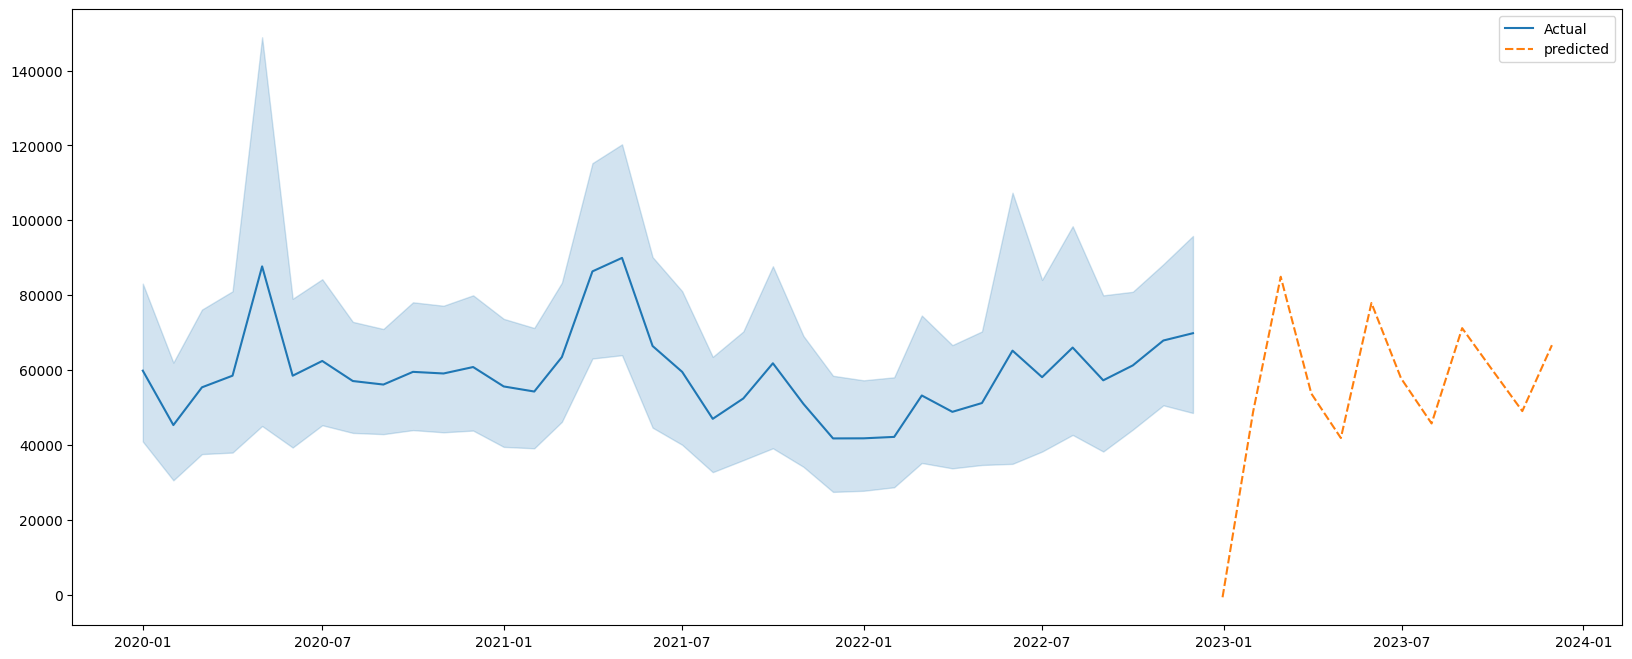

In [29]:
#Question-1 prediction of next one year
#Question-3 Graph for predicted and actual values
predict_future(df['Level 4'], (3, 0, 3))

In [30]:
#Question-2: MAPE of model
lis = list(df['Level 1'])
sum = 0.0000
actual_values = lis[-432:]
forecast_value = list(pred1)
for i in range(0, 432):
  sum = sum + abs((actual_values[i]-forecast_value[i])/actual_values[i])
print(sum)
MAPE = sum/30
print("MAPE: ") 
print(MAPE)

MSE = np.square(np.subtract(actual_values,forecast_value)).mean()   
rsme = mt.sqrt(MSE)  
print("Root Mean Square Error: ")  
print(rsme)  

365.25654737492044
MAPE: 
12.175218245830681
Root Mean Square Error: 
1462539.4272112332


In [31]:
for i in df['Place_in_India'].unique():
  print("for the city "+i)
  ad_test(df['Level 4'].loc[df['Place_in_India']==i])
  print("\n")

for the city Bengaluru
1. ADF :  -3.1630145181437124
2. P-Value :  0.022227866199320778
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 420
5. Critical Values :
	 1% :  -3.4460159927788574
	 5% :  -2.868446209372638
	 10% :  -2.570448781179138


for the city Hyderabad
1. ADF :  -2.2448358052400272
2. P-Value :  0.19037673150968487
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 417
5. Critical Values :
	 1% :  -3.446129402876608
	 5% :  -2.8684960761128346
	 10% :  -2.570475362616382


for the city Dehradun
1. ADF :  -20.88499420311912
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 431
5. Critical Values :
	 1% :  -3.445613745346461
	 5% :  -2.868269325317112
	 10% :  -2.5703544951308404


for the city Indore
1. ADF :  -2.2580285869084498
2. P-Value :  0.18586194465349581
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 420
5. Critical Values :
	 1% :  -3.4460159927788574
	 5% :  -2.868

In [32]:
df['Place_in_India'].unique()

array(['Bengaluru', 'Hyderabad', 'Dehradun', 'Indore', 'Pune'],
      dtype=object)

for the city Bengaluru
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10283.763, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10292.172, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10291.894, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10291.200, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10443.480, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10283.763, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=10282.774, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=10283.125, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10295.330, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=10284.593, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=10423.820, Time=0.03 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.723 seconds
                               SARIMAX Results                                
Dep. Variable:                Level 4   N

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\2074375558.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please



for the city Hyderabad
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10453.532, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10816.414, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10751.769, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10573.944, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10814.415, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10514.046, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10556.532, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10468.816, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10358.655, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10510.997, Time=0.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10328.760, Time=0.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10208.648, Time=0.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10183.033, Time=0.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10340.004, Time=0.2

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autore

                               SARIMAX Results                                
Dep. Variable:                Level 4   No. Observations:                  432
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -5010.413
Date:                Mon, 22 Apr 2024   AIC                          10040.827
Time:                        02:20:01   BIC                          10081.488
Sample:                             0   HQIC                         10056.881
                                - 432                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0090      0.013     -0.677      0.498      -0.035       0.017
ar.L2         -0.9885      0.016    -62.318      0.000      -1.020      -0.957
ar.L3          0.0047      0.015      0.316      0.7

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\2074375558.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please



for the city Indore
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11213.280, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11537.336, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11505.599, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11535.338, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11373.879, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11220.413, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11178.791, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11249.306, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=11136.354, Time=0.66 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11242.539, Time=0.29 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=11134.822, Time=0.74 sec
 ARIMA(4,1,4)(0

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                               SARIMAX Results                                
Dep. Variable:                Level 4   No. Observations:                  432
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -5378.404
Date:                Mon, 22 Apr 2024   AIC                          10776.808
Time:                        02:20:20   BIC                          10817.470
Sample:                             0   HQIC                         10792.863
                                - 432                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0076      0.010      0.760      0.447      -0.012       0.027
ar.L2         -0.9975      0.018    -56.884      0.000      -1.032      -0.963
ar.L3          0.0021      0.010      0.204      0.8

c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hardik Kachhwaha\OneDrive\Desktop\Arima\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                               SARIMAX Results                                
Dep. Variable:                Level 4   No. Observations:                  432
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5502.202
Date:                Mon, 22 Apr 2024   AIC                          11016.404
Time:                        02:20:23   BIC                          11040.815
Sample:                             0   HQIC                         11026.041
                                - 432                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.114e+04   1.04e+04      7.839      0.000    6.09e+04    1.01e+05
ar.L1         -0.9991      0.004   -235.907      0.000      -1.007      -0.991
ar.L2         -0.9995      0.002   -532.050      0.0

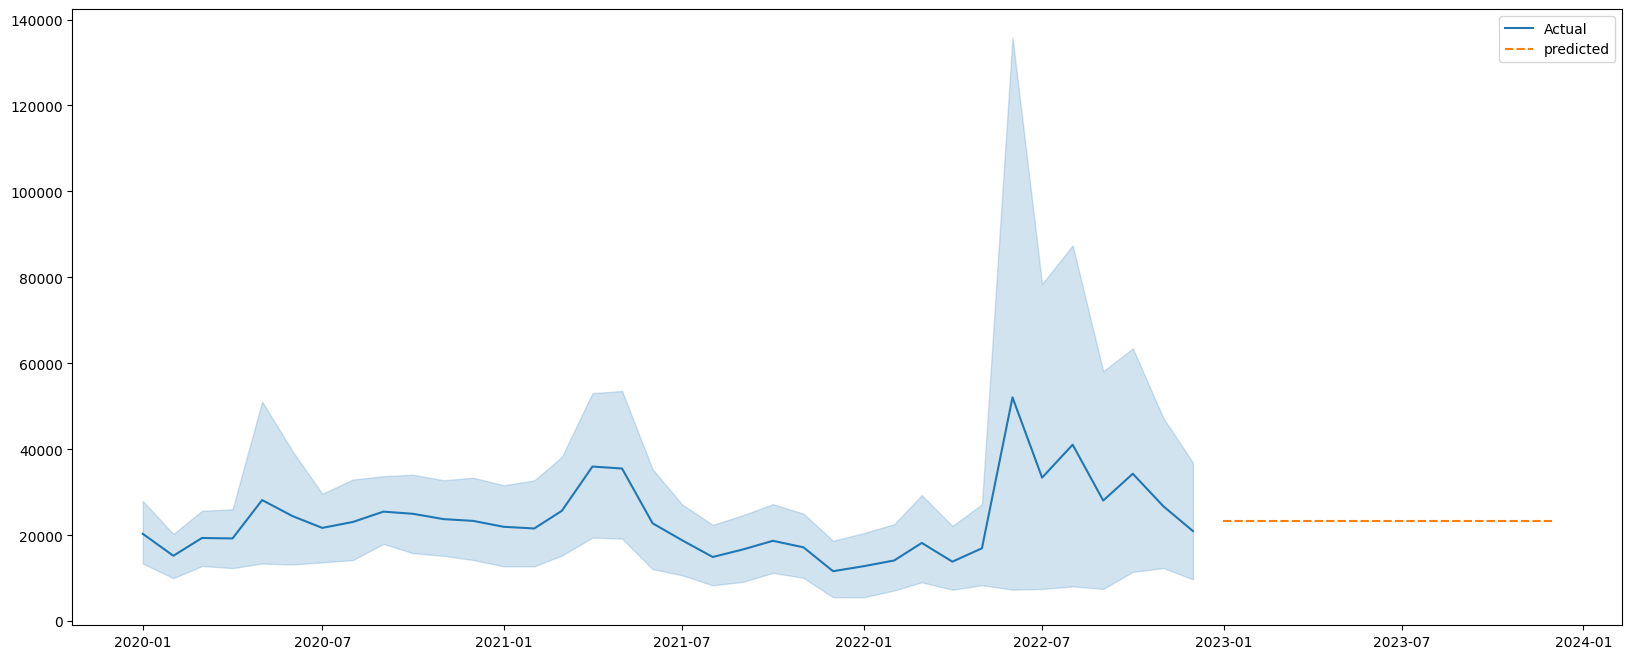

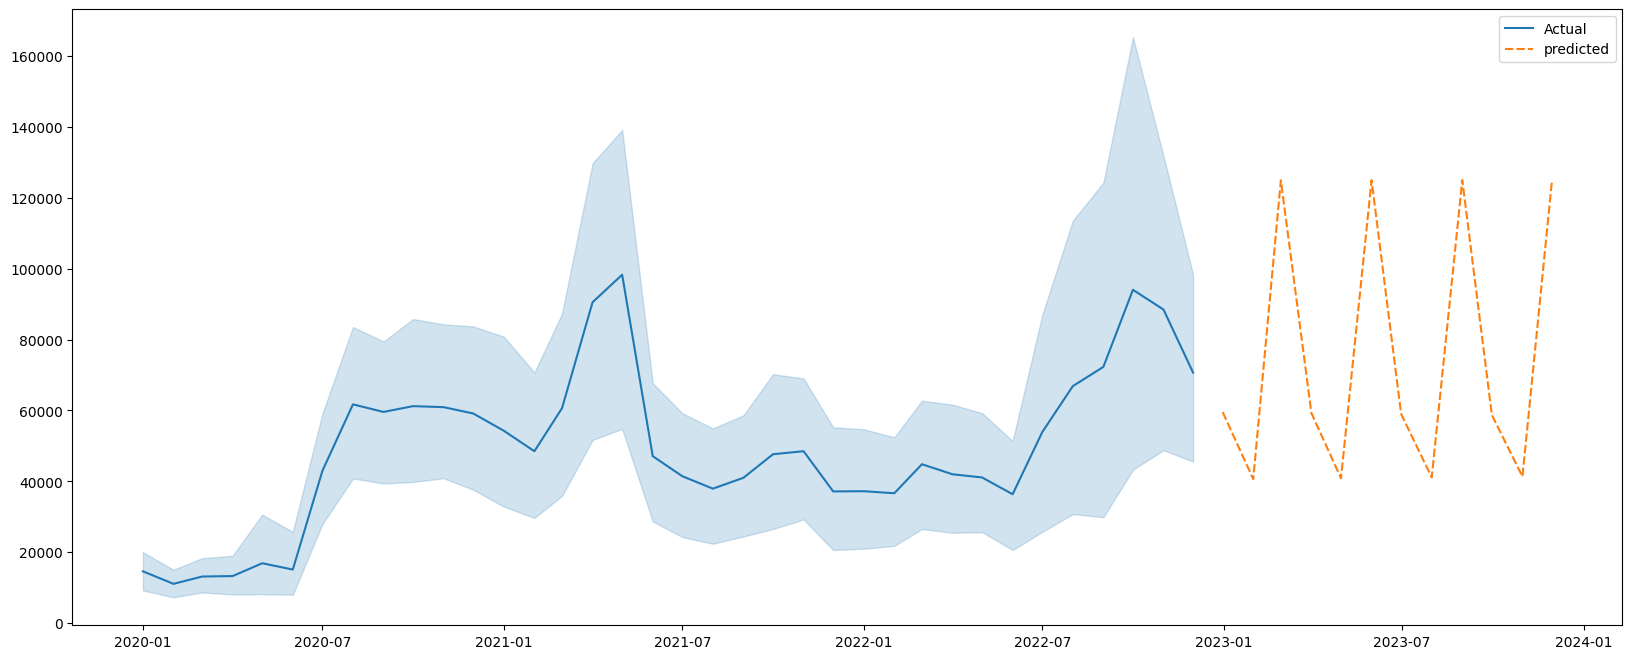

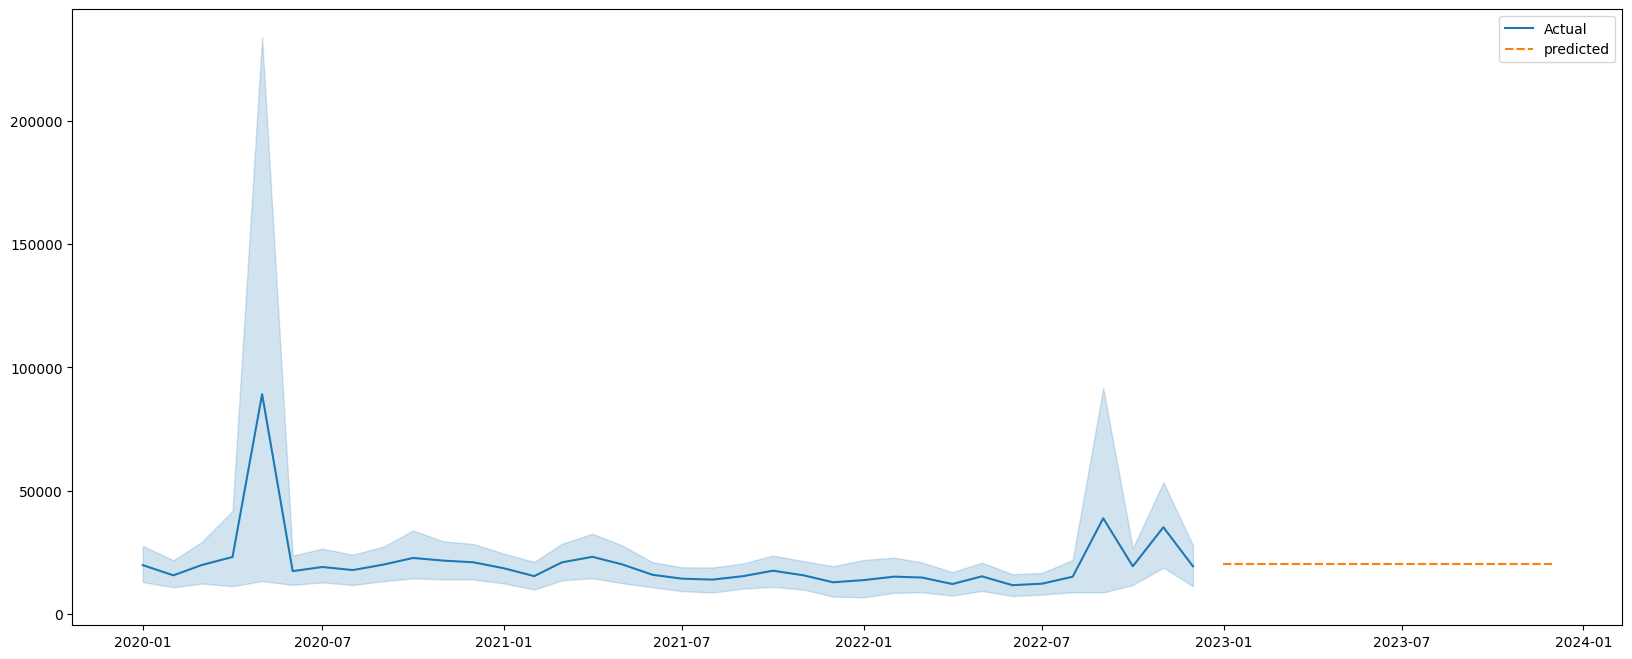

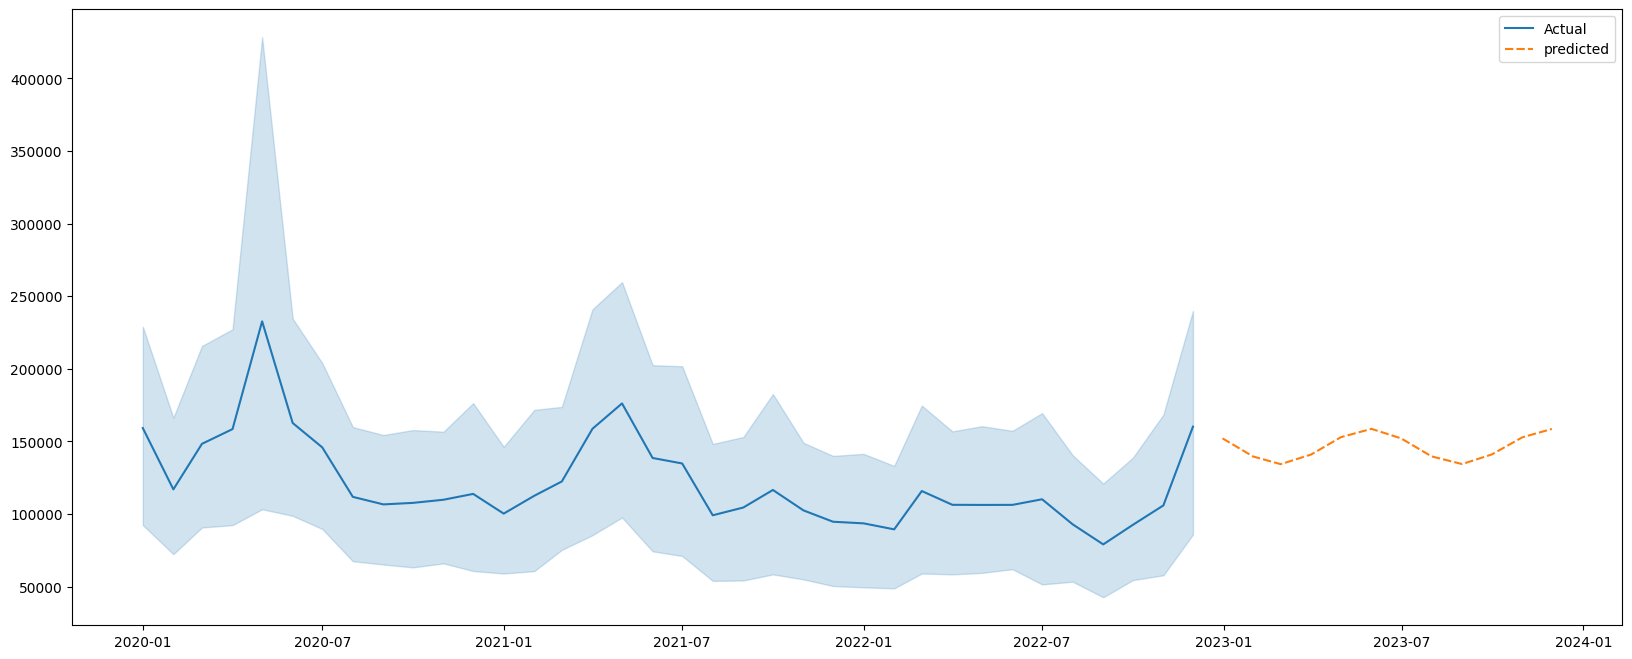

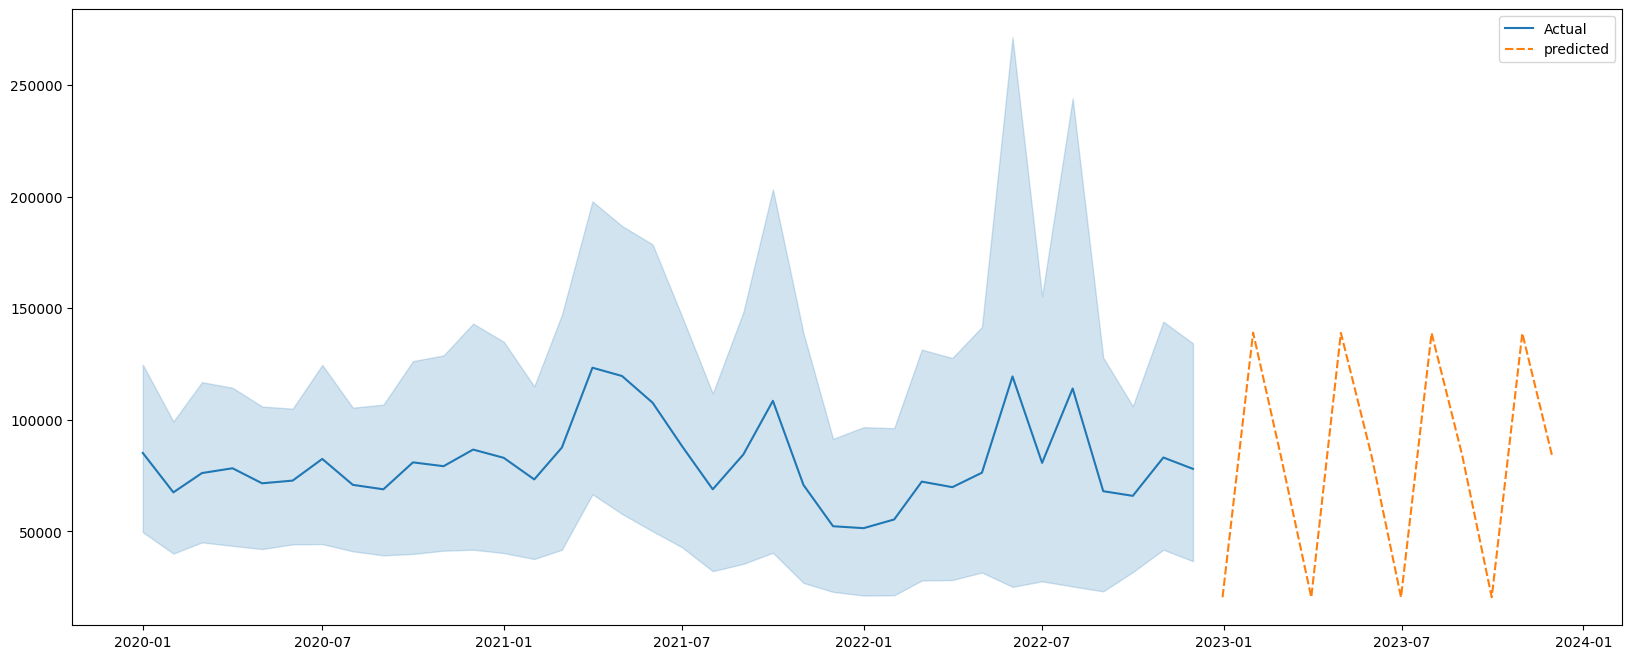

In [33]:
for i in df['Place_in_India'].unique():
  print("for the city "+i)
  stepwise_fit = auto_arima(df['Level 4'].loc[df['Place_in_India']==i], trace=True, suppress_warnings=True)
  predict_future(df['Level 4'].loc[df['Place_in_India']==i] ,stepwise_fit.order)
  print("\n")

C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3926253086.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Place_in_India']==i], ci=None, label=i)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3926253086.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Place_in_India']==i], ci=None, label=i)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3926253086.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Place_in_India']==i], ci=None, label=i)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3926253086.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Place_in_India']==i], ci=None, l

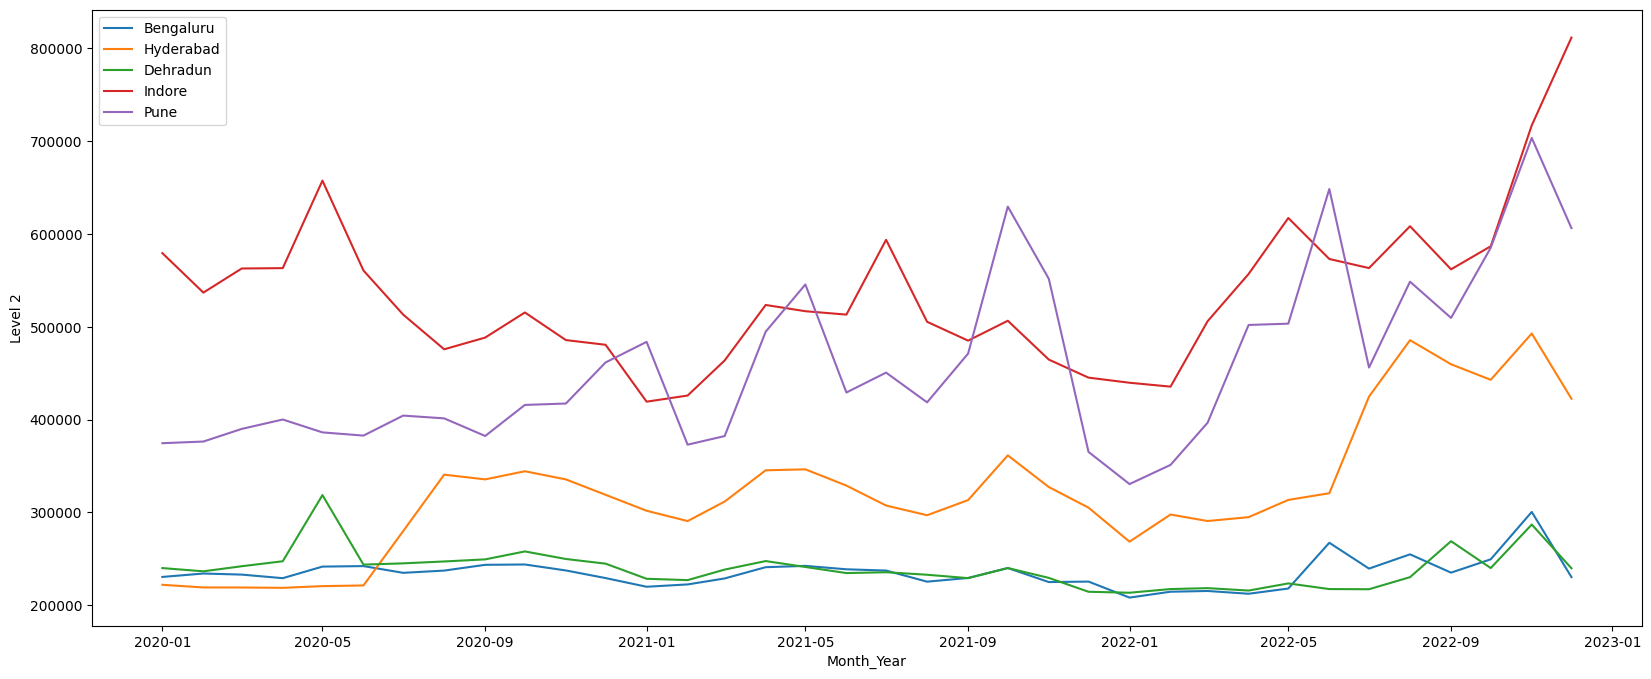

In [34]:
#Visualization
#Question-1
plt.figure(figsize=(20, 8))
#ax = df['Place_in_India'].unique()
for i in df['Place_in_India'].unique():
  sns.lineplot(data=df['Level 2'].loc[df['Place_in_India']==i], ci=None, label=i)

In [35]:
df['Laptop/Desktop'].unique()

array(['Desktop_Website', 'Laptop_Website'], dtype=object)

C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3868696999.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Coming from']==i], ci=None, label=i)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3868696999.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Coming from']==i], ci=None, label=i)
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\3868696999.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 2'].loc[df['Coming from']==i], ci=None, label=i)


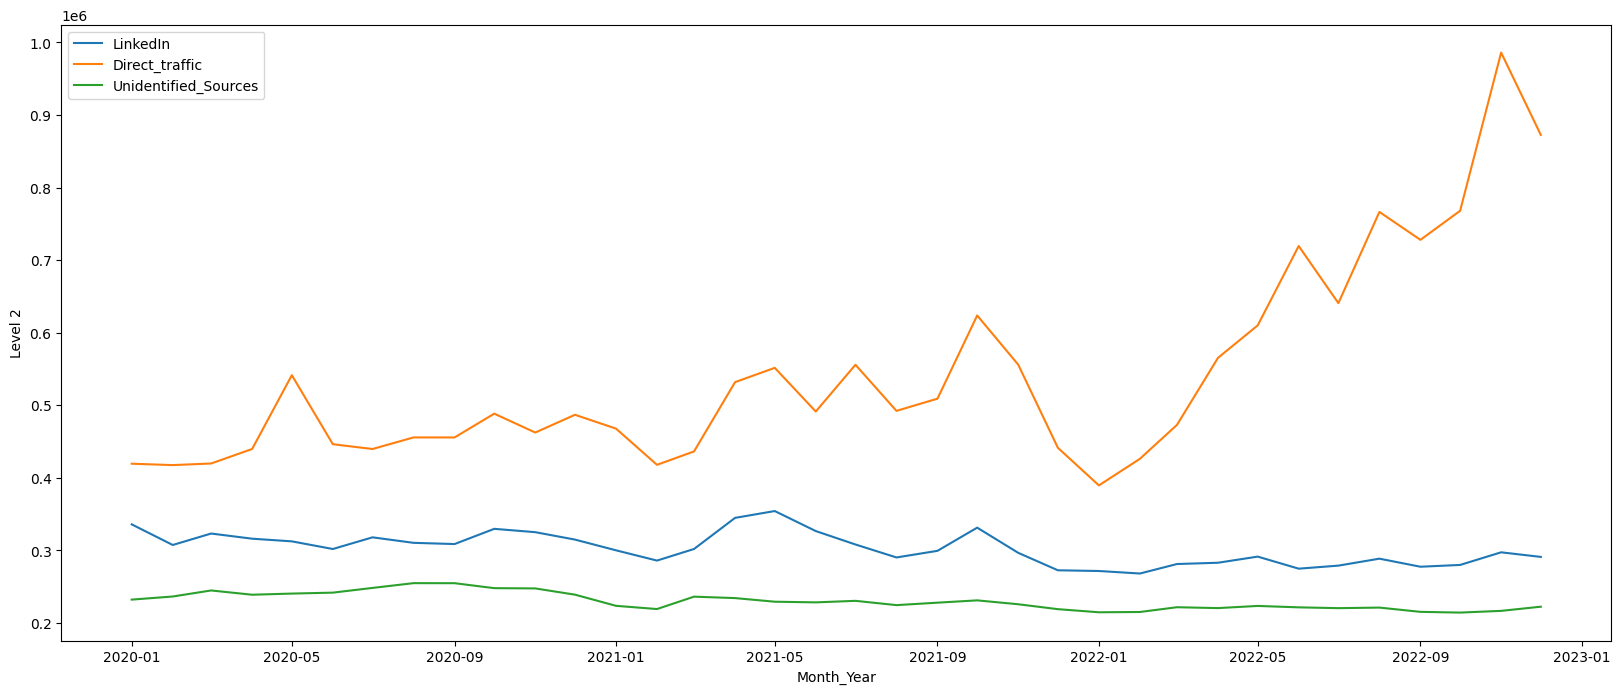

In [36]:
#Question-3
plt.figure(figsize=(20, 8))
for i in df['Coming from'].unique():
  sns.lineplot(data=df['Level 2'].loc[df['Coming from']==i], ci=None, label=i)

C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\2575925152.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 1'], ci=None, label='Level 1')
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\2575925152.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['Level 4'] ,ci=None, label='Level 4')
C:\Users\Hardik Kachhwaha\AppData\Local\Temp\ipykernel_2144\2575925152.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df['inc/dec percentage'], ci=None, label='inc/dec percentage')


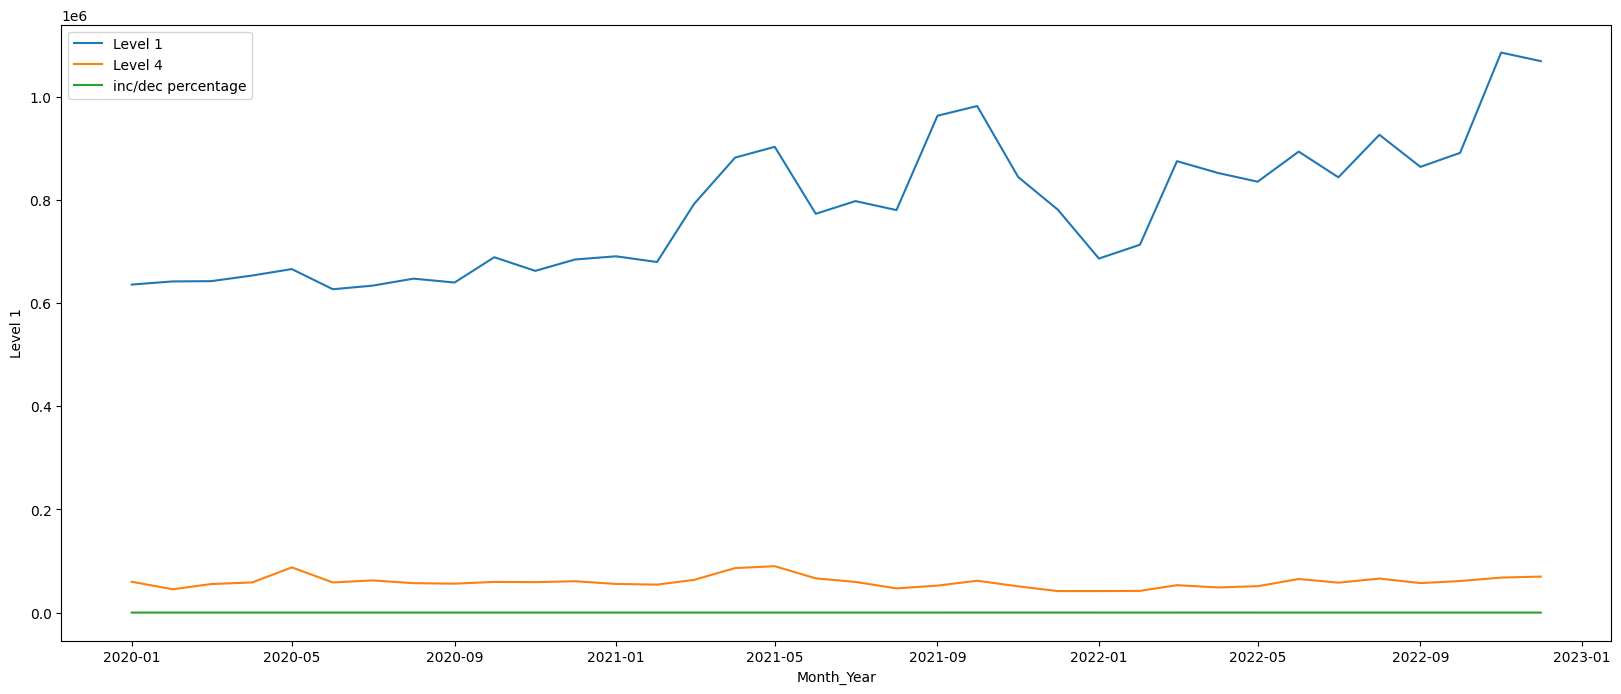

In [37]:
#Question-4
plt.figure(figsize=(20,8))
sns.lineplot(data=df['Level 1'], ci=None, label='Level 1')
sns.lineplot(data=df['Level 4'] ,ci=None, label='Level 4')
sns.lineplot(data=df['inc/dec percentage'], ci=None, label='inc/dec percentage')
plt.show()

<Axes: xlabel='Month', ylabel='Level 1'>

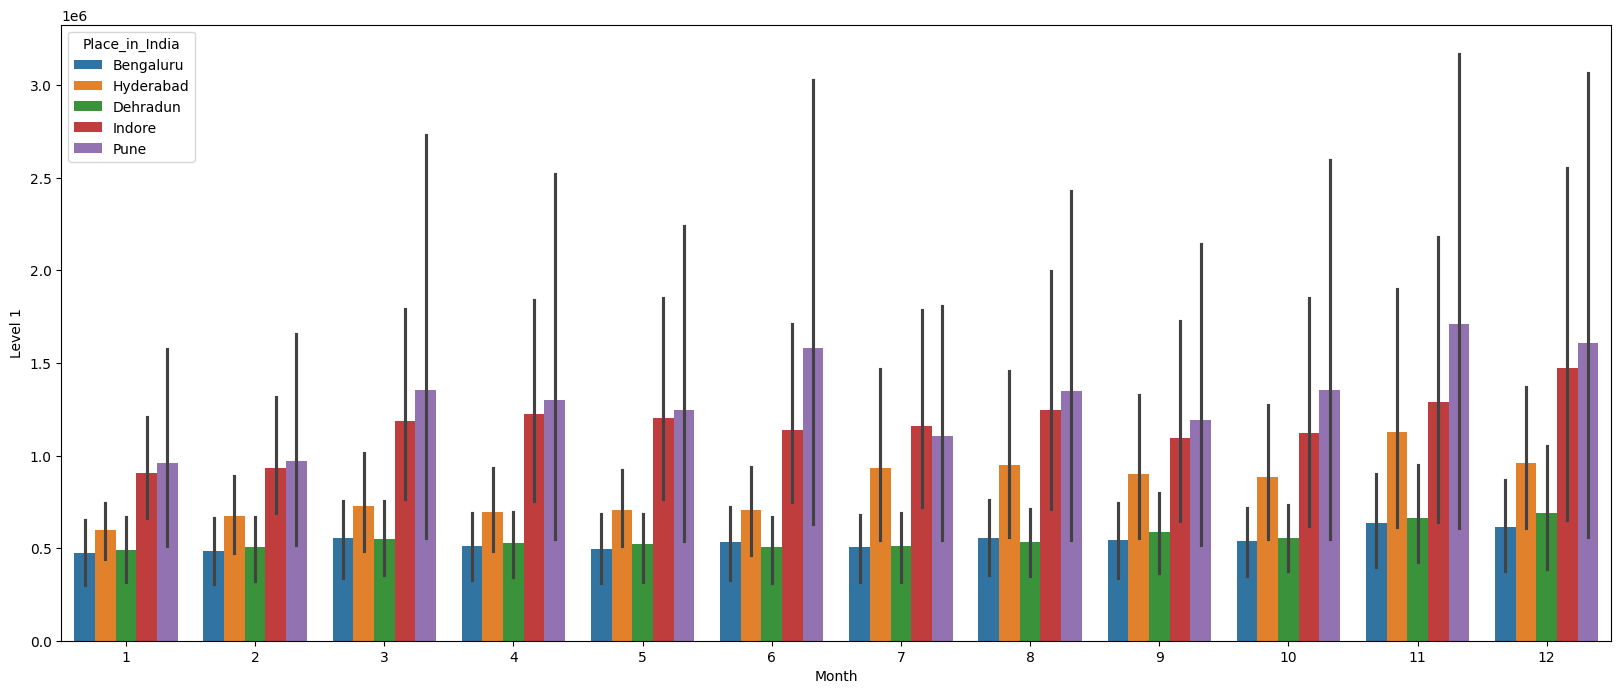

In [38]:
#Question-6
plt.figure(figsize=(20, 8))
sns.barplot(data=df[['Level 1', 'Place_in_India', 'Month']].loc[df['Year']=='2022'],x="Month", y="Level 1" ,hue='Place_in_India')